Repositorio: https://github.com/acabreraufrj/modelagem
 
[< abrir em binder >](https://mybinder.org/v2/gh/acabreraufrj/modelagem/master?filepath=aulas%2FAula10.ipynb)

# Aula 10: Leis de Kepler e dados da NASA

## objetivos:

- Lembrar das [leis de Kepler](https://pt.wikipedia.org/wiki/Leis_de_Kepler) e a [teoria de gravitação de Newton](https://pt.wikipedia.org/wiki/Lei_da_gravita%C3%A7%C3%A3o_universal) para o movimento planetario

- Entender as leis de Kepler usando os dados sobre a posição dos planetas da base Horizons da NASA:

https://ssd.jpl.nasa.gov/horizons.cgi#top

- plotar trajetorias desde diferentes sistemas de referencia, fazer um fit das elipses, calcular periodos e parametrizações temporais

# Lembremos: Modelagem = 1+2+3

![](./figs/diagr_modelagem_def.jpg)

# Um pouco de historia

- Desde a greça antiga tem propostas para modelar (matemáticamente!) o movimento de corpos celestes. Os mais aceitos eram modelos geo-céntricos ([Aristóteles](https://en.wikipedia.org/wiki/Aristotle) $\sim 300 ac$, [Ptolomeu](https://en.wikipedia.org/wiki/Ptolemy) $\sim 100 dc$,...) 

- dados de observações: [Tycho Brahe](https://en.wikipedia.org/wiki/Tycho_Brahe) $\sim 1600$, tabelas de observações astronómicas muito precisas, "o primeiro com espíritu empírico"

- [Kepler](https://en.wikipedia.org/wiki/Johannes_Kepler) assistio T. Brahe em 1600, usando as tabelas formulou as *3 leis de Kepler* (Modelagem 1+2+3 sem computador!)

- [Newton](https://en.wikipedia.org/wiki/Isaac_Newton) formulou ("apoiado em ombros de gigantes") a *lei de gravitação* que dava uma explicação mais fundamental das Leis de Kepler. Em particular, usando Cálculo e leis infinitesimais de movimento e forças (refinamento de Modelagem(1,2)).


# Modelos em geral

- (1) a posição dos planetas $p$ no ceu determina uma curva $x_p \in E^3$ no espaço Euclidiano tridimensional. Esta curva deve seguir '**leis**' geometricas (ou diferenciais)
- (2) como consequencias matemáticas das leis podemos deducir as órbitas $O_p$ dos planetas
- (3) a predição de que o planeta $p$ se movimenta numa órbita $O_p$ pode ser verificada fazendo observações do ceu

# Leis de Kepler
Para cada planeta no sistema solar, vale:

- (**K1:** sobre a geometria das órbitas) a órbita de cada planeta é uma elipse com o sol em um dos focos
- (**K2:** sobre a evolução temporal) o segmento de reta que une o sol ao planeta varre áreas iguais em intervalos de tempo iguais
- (**K3:** sobre os períodos) o período $T$ da órbita ao quadrado é proporcional ao cubo do semi-eixo maior $a$ da órbita $$ T^2 = k \ a^3, \ \ k: \ constante \ (igual \ para \ todos \ os \ planetas!) $$

# Teoria de Newton
Usando as Leis de Kepler, Newton deduziu quais forças deveriam estar por trás do movimento dos planetas, dadas suas "leis gerais de movimento" (infinitesimais, com as forças como input)
$$ \text{(1 lei) def: sistema ref. inercial}, \ (2 \ lei) \ m \ddot x = F \text{ para cada particula}, \ \ (3 \ lei) \ \text{Açao-reaçao}  $$

Ele chegou em:

- Cada planeta $p$ do sistema solar sente uma força de atração ao Sol $s$ dada por:
$$ F_{p,s} = G m_p m_s \frac{x_s - x_p}{|x_s - x_p|} $$
$x_s,x_p \in \mathbb{R}^3$ posição (resp. sistema de ref. inercial),
$m_p,m_s > 0$ massas,
$G:$ constante a ser determinada ("universal" para todos os planetas!)


## Obs: centro de massa e movimento relativo

- centro de massa (CM): $x_{cm} = \frac{1}{m_s+m_p} (m_s x_s + m_p x_p)$
- posição relativa ao CM: $r:= x_p - x_s$ posicao relativa, $\mu = \frac{m_s m_p}{m_s + m_p}$ massa reduzida

**Prop:**(Exercicio) das Leis de Newton se deduz:
- $\ddot x_{cm} =0$ ($\Rightarrow$ um sistema de referencia com origem no $x_{cm}(t)$ é inercial)
- $\mu \ddot r = F_{r,0}$ o vetor posicao relativa, com massa $\mu$, sofre uma forca central desde a origem [Particula em força central](https://en.wikipedia.org/wiki/Classical_central-force_problem)


**Obs:** se $m_s>>m_p$, $x_{cm} \simeq x_s$. Em alguns livros, para simplificar a manipulação das eqs. de Newton, se toma um sistema de referencia com origem no sol (e eixos fixos dados) para todo $t$. A aproximação vem de assumir que este sistema é inercial (que as leis de Newton valem desde ele).

## Deduzindo Kepler desde Newton

Pode se provar que toda solução $t \mapsto r(t)$ do problema de força central, com momento angular $\mu r\times \dot r \neq 0$, fica contica em uma curva $\mathcal{C} \subset \mathbb{R}^3$ que é uma **conica**.

Além disto, as unicas trajetorias periodicas em $t$ são aquelas que estão contidas em **elipses**.

As Leis de Kepler podem ser verificadas partindo de uma solução periodica $t \mapsto r(t)$ do problema de força central. (Exercicio teorico! podem usar o computador tambem!)

**Obs**: Em algum sentido, Newton fez 'ingenieria reversa' e achou a formula $F(r) \sim r/\| r \|^3$ era tal que se podiam deduzir as leis de Kepler.


# Verificando as Leis de Kepler com os dados da NASA

- Base de dados Horizons: https://ssd.jpl.nasa.gov/horizons.cgi#top
- pode gerar o estado posição-velocidade $(x_p(t), v_p(t)) \in \mathbb{R^6}$ de qualquer planeta (e outros objetos celestes) em funçao do tempo e com respeito a sistemas de referencia escolhidos (eg: com centro na terra, no sol, etc., até como seria observado de algum dado observatorio na terra!)
- pode-se escolher para gerar um archivo .csv com os dados (este archivo tem info extra no inicio e no final, que foi apagada nos archivos localizados em ./data/ desta aula)


## comentarios sobre base Horizons:

- tem uma opcao de colocar data inicial, data final, e particionar o intervalo em $N$ partes iguais. Eu fiz isto (pode se usar o índice do vetor na lista como parametro de $t$!), para todos os archivos '..._desde_sol'.
- **cuidado**: em 'table settings' tem uma opção de 'reference plane'. Notar que todas as 3 opções são eixos dinamicos: vao mudando com o tempo (em relação a um sistema inercial abstrato). Isto se traduz em que, por exemplo, o plano de orbita de um mesmo planeta (visto desde este sistema horizons) pode variar muito com tempo! eu escolhi a opção 'body mean equator and node of date' que era a que apresentava menos variaçao.
- o horizons gera texto que tem uma tabela, mas tem texto explicativo ao redor (antes e depois). Aqui tem uma rotina que elimina este texto e dá um .csv só com os dados da tabela (**cuidado**: so fiz para uma configuracao particular, eg: para o formato 'state' (x,y,z,vx,vy,vz) nas opcoes 'Table Settings -> Select vector table output'; em geral, tem que colocar um 'header' a mão ao gerar o .csv).

In [1]:
# pacotes
import pandas
import re, datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from os import listdir
from os.path import isfile, join
import scipy.optimize as optimize

# Plotando as posições (desde um observatorio na Terra)

In [2]:
# Uma rotina que transforma horizons_...txt com muitos dados a uma tabela tabela_...csv só com tempos e estados
mypath='./data'
archivostxt = [f for f in listdir(mypath) if isfile(join(mypath, f)) and 'horizons' in f and 'txt' in f]
for i in range(len(archivostxt)):
    nome_arch = archivostxt[i]
    o_arch = './data/'+nome_arch
    novo_arch = './data/'+nome_arch.replace("horizons_","tabela_").replace(".txt",".csv")
    print('abrindo:', o_arch)
    archtxt=open(o_arch, 'r')
    print('criando novo:', novo_arch)
    novoarch = open(novo_arch, 'w')
    header = 'JDTDB,Calendar Date (TDB),delta-T,X,Y,Z,VX,VY,VZ,\n'
    novoarch.write(header)
    linhas = archtxt.readlines()
    com = 0
    stop = False
    primeiro = False
    for il,l in enumerate(linhas):
        if l == '$$EOE\n':
            stop = True
        if com == 1 and stop == False:
            novoarch.write(l)
        if l == '$$SOE\n':
            com = 1
    archtxt.close()
    novoarch.close()
    

abrindo: ./data/horizons_sol_desde_dinamarca.txt
criando novo: ./data/tabela_sol_desde_dinamarca.csv
abrindo: ./data/horizons_mercurio_desde_sol.txt
criando novo: ./data/tabela_mercurio_desde_sol.csv
abrindo: ./data/horizons_marte_desde_sol.txt
criando novo: ./data/tabela_marte_desde_sol.csv
abrindo: ./data/horizons_urano_desde_sol.txt
criando novo: ./data/tabela_urano_desde_sol.csv
abrindo: ./data/horizons_neptuno_desde_sol.txt
criando novo: ./data/tabela_neptuno_desde_sol.csv
abrindo: ./data/horizons_jupiter_desde_dinamarca.txt
criando novo: ./data/tabela_jupiter_desde_dinamarca.csv
abrindo: ./data/horizons_venus_desde_dinamarca.txt
criando novo: ./data/tabela_venus_desde_dinamarca.csv
abrindo: ./data/horizons_voyager1_desde_sol.txt
criando novo: ./data/tabela_voyager1_desde_sol.csv
abrindo: ./data/horizons_terra_desde_sol.txt
criando novo: ./data/tabela_terra_desde_sol.csv
abrindo: ./data/horizons_urano_desde_dinamarca.txt
criando novo: ./data/tabela_urano_desde_dinamarca.csv
abrind

In [3]:
def procurar_archivos_com(mypath, strings_no_nome):
    # mypath = './data'
    ret = []
    todosarchivos = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    for f in todosarchivos:
        criterio_f = 0
        for s in strings_no_nome:
            if s in f:
                criterio_f += 1
        if criterio_f == len(strings_no_nome):
            ret.append(f)
    return ret


In [4]:
# buscamos archivos de dados desde dinamarca
archivos = procurar_archivos_com('./data', ['.csv','tabela','dinamarca'])
descricoes = [(a.replace("tabela_","")).replace(".csv","").replace("_"," ") for a in archivos]
descsimps = [d.partition(' ')[0] for d in descricoes]
print(archivos)
print(descricoes)
print(descsimps)
grupo1 = ['sol', 'mercurio', 'venus', 'terra', 'marte']
grupo2 = ['sol','jupiter', 'saturno','urano','neptuno','plutao']

DFs = [] # os dataframes
for i in range(len(archivos)):
    DFs.append(pandas.read_csv(mypath+"/"+archivos[i]))

['tabela_jupiter_desde_dinamarca.csv', 'tabela_venus_desde_dinamarca.csv', 'tabela_sol_desde_dinamarca.csv', 'tabela_marte_desde_dinamarca.csv', 'tabela_saturno_desde_dinamarca.csv', 'tabela_mercurio_desde_dinamarca.csv', 'tabela_urano_desde_dinamarca.csv']
['jupiter desde dinamarca', 'venus desde dinamarca', 'sol desde dinamarca', 'marte desde dinamarca', 'saturno desde dinamarca', 'mercurio desde dinamarca', 'urano desde dinamarca']
['jupiter', 'venus', 'sol', 'marte', 'saturno', 'mercurio', 'urano']


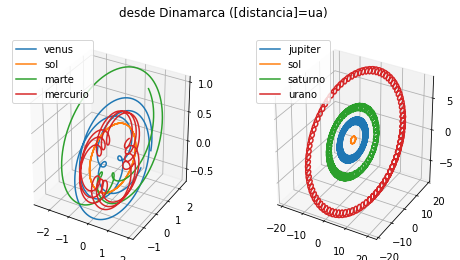

In [5]:
# plotamos
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plt.suptitle('desde Dinamarca ([distancia]=ua)')
for a in range(len(archivos)):
    x = DFs[a]['X']
    y = DFs[a]['Y']
    z = DFs[a]['Z']
    if descricoes[a].partition(' ')[0] in grupo1:
        ax1.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax1.legend()
    if descricoes[a].partition(' ')[0] in grupo2:
        ax2.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax2.legend()
plt.show()

![](./figs/planetas_desde_dinamarca.png)
ua= [unidade astronomica](https://en.wikipedia.org/wiki/Astronomical_unit) = 149 597 870 700 metros (dist. media terra-sol)

# Obs: Modelo de [Copernico](https://en.wikipedia.org/wiki/Nicolaus_Copernicus)  $\sim 1500$ 
## (ou [A. de Samos](https://en.wikipedia.org/wiki/Aristarchus_of_Samos) $\sim 300 a.c.$!)

3 leis:

- os planetas se movimentam em circulos
- o sol esta no centro
- a velocidade angular é constante

**Obs**: Notavel o nivel de boa aproximacao! (excentricidade da órbita da terra $e_\tau = 0.016710219$, $e=0$ é círculo)

# K1: verificando as elipses

### Lembrete:

uma elipse pode ser escrita como:
$$ E_{\Pi,F,l} := \{ P \in \Pi: \frac{dist(P,F)}{dist(P,l)} = e \} $$
onde $\Pi \in \mathbb{R}^3$ é o plano que contem a elipse, $e\in [0,1)$ é a excentricidade, $F$ é um dos focos, $l \subset \Pi$ é uma reta diretriz.

**Notar**: (parametrização redundante de possíveis elipses) $\Pi$ pode ser definido por um vetor normal $N$ ($|N|=1$), dentro do plano podemos usar 2 vetores $v_{mai},v_{men}$ alinhados com os eixos da elipse e tais que $\| v_{mai} \| = a, \| v_{men} \| = b$ os comprimentos dos semieixos. Tambem usamos o centro $C\in \mathbb{R}^3$ da elipse. Dados estes dados, 
$$ P \in E \iff (P-C) \cdot N = 0 $$ $$ e $$ $$ [ ((P-C)\cdot v_{mai})^2/a^4 +((P-C)\cdot v_{men})^2/b^4 = 1  ]$$

![](./figs/elipse.png)
$excentr = c/a$, $b^2 = a^2-c^2$ 

$dmax(F,El) + dmin(F,El) = 2a$, $dmax(F,El) - dmin(F,El) =2c$

In [6]:
## carregar dados desde o sol
archivos = procurar_archivos_com('./data', ['.csv','tabela','sol'])
descricoes = [(a.replace("tabela_","")).replace(".csv","").replace("_"," ") for a in archivos]
# só alguns, outros ficam para exercicio
archivos = [archivos[i] for i,d in enumerate(descricoes) if d.partition(' ')[0] in ['mercurio','venus','terra','marte','jupiter','saturno','urano'] ]
descricoes = [(a.replace("tabela_","")).replace(".csv","").replace("_"," ") for a in archivos]
descsimps = [d.partition(' ')[0] for d in descricoes]
print(archivos)
print(descricoes)
print(descsimps)
DFs = [] # os dataframes
for i in range(len(archivos)):
    DFs.append(pandas.read_csv(mypath+"/"+archivos[i]))


['tabela_urano_desde_sol.csv', 'tabela_mercurio_desde_sol.csv', 'tabela_jupiter_desde_sol.csv', 'tabela_saturno_desde_sol.csv', 'tabela_venus_desde_sol.csv', 'tabela_marte_desde_sol.csv', 'tabela_terra_desde_sol.csv']
['urano desde sol', 'mercurio desde sol', 'jupiter desde sol', 'saturno desde sol', 'venus desde sol', 'marte desde sol', 'terra desde sol']
['urano', 'mercurio', 'jupiter', 'saturno', 'venus', 'marte', 'terra']


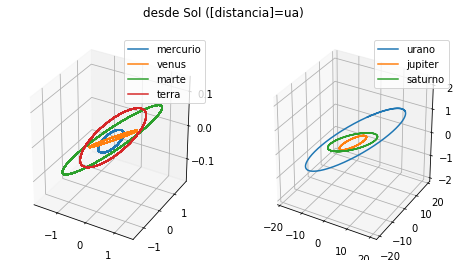

In [7]:
# plotamos
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plt.suptitle('desde Sol ([distancia]=ua)')
for a in range(len(archivos)):
    x = DFs[a]['X']
    y = DFs[a]['Y']
    z = DFs[a]['Z']
    if descricoes[a].partition(' ')[0] in grupo1:
        ax1.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax1.legend()
    if descricoes[a].partition(' ')[0] in grupo2:
        ax2.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax2.legend()
plt.show()

![](./figs/planetas_desde_sol.png)

In [8]:
# definimos as orbitas
Orbitas = []
for a in range(len(archivos)):
    x = DFs[a]['X']
    y = DFs[a]['Y']
    z = DFs[a]['Z']
    Orbitas.append([x,y,z]) 


        

In [9]:
# funcoes para manipular orbitas, calcular indice de retorno, etc
def reducir_orb(Orb,inds):
    [x,y,z] = Orb
    nx = [x[i] for i in inds]
    ny = [y[i] for i in inds]
    nz = [z[i] for i in inds]
    NOrb = [nx,ny,nz]
    return NOrb

def indice_retorno(Orb,epsilon):
    x = Orb[0]
    y = Orb[1]
    z = Orb[2]
    i_entradas = []
    for i in range(len(x)):
        if ((x[0]-x[i])**2 +(y[0]-y[i])**2 + (z[0]-z[i])**2 ) < epsilon**2 and i>10:
            i_entradas.append(i)
    return i_entradas

# Indice de retorno das órbitas: periodos $T_p$

Os dados foram gerados com posições dos planetas ao longo de 100 anos divididos em $10^4$ intervalos iguais
$$ \Delta t = \frac{100}{10^4} anos = \frac{1}{100} anos \simeq 3,65 dias $$

In [10]:
# calculamos indices de retorno, e orbitas ate primeiro retorno
indrets = []
prOrbitas = []
for a in range(len(archivos)):
    [x,y,z]=Orbitas[a]
    epsilon = max([np.abs(x[0] - x[1]),np.abs(y[0]-y[1]),np.abs(z[0]-z[1]), 0.01])
    lir = indice_retorno(Orbitas[a],epsilon)
    indrets.append(lir)
    ir = lir[0]
    print(descricoes[a], ' primer retorno (indice):', ir, ' equiv.', ir*3.65, ' dias')
    prOrbitas.append(reducir_orb(Orbitas[a],range(ir)))




urano desde sol  primer retorno (indice): 8401  equiv. 30663.649999999998  dias
mercurio desde sol  primer retorno (indice): 24  equiv. 87.6  dias
jupiter desde sol  primer retorno (indice): 1186  equiv. 4328.9  dias
saturno desde sol  primer retorno (indice): 2944  equiv. 10745.6  dias
venus desde sol  primer retorno (indice): 61  equiv. 222.65  dias
marte desde sol  primer retorno (indice): 188  equiv. 686.1999999999999  dias
terra desde sol  primer retorno (indice): 100  equiv. 365.0  dias


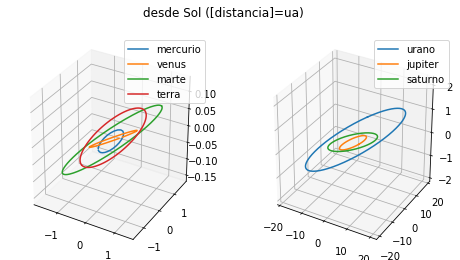

In [11]:
# plotamos as orbita ate primeiro retorno
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
plt.suptitle('desde Sol ([distancia]=ua)')
for a in range(len(archivos)):
    [x,y,z] = prOrbitas[a]
    if descricoes[a].partition(' ')[0] in grupo1:
        ax1.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax1.legend()
    if descricoes[a].partition(' ')[0] in grupo2:
        ax2.plot(x, y, z, label=descricoes[a].partition(' ')[0])
        ax2.legend()
plt.show()

In [12]:
# funcoes relativas a distancia ao sol ao longo da orbita
def dist(P,Q):
    return np.sqrt((P[0]-Q[0])**2 + (P[1]-Q[1])**2 + (P[2]-Q[2])**2 )

def dist_Orb(P,Orb):
    [x,y,z]=Orb
    di_l = []
    for i in range(len(x)):
        di_l.append(dist(P,[x[i],y[i],z[i]]))
    return di_l

def dist_min_max(P,Orb):
    [x,y,z]=Orb
    dil = dist_Orb(P,Orb)
    limax = []
    ldmax =[]
    limin = []
    ldmin = []
    for i in range(2,len(x)-2):
        if dil[i-1] < dil[i] and dil[i+1] < dil[i] and dil[i-2] < dil[i] and dil[i+2] < dil[i]:
            limax.append(i)
            ldmax.append(dil[i])
        if dil[i-1] > dil[i] and dil[i+1] > dil[i] and dil[i-2] > dil[i] and dil[i+2] > dil[i]:
            limin.append(i)
            ldmin.append(dil[i])
    return limax,ldmax,limin,ldmin

In [13]:
#achando dist maxs e mins ao sol
limins = []
limaxs = []
dmaxavs = []
dminavs = []
dmediasols = []
for a in range(len(archivos)):
    limax,ldmax,limin,ldmin = dist_min_max([0,0,0], Orbitas[a])
    limins.append(limin)
    limaxs.append(limax)
    dmaxavs.append(np.average(ldmax))
    dminavs.append(np.average(ldmin))
    dmediasols.append(np.average([dmaxavs[a],dminavs[a]]))
    print(descricoes[a]+':', 'dmin avg(au):',dminavs[a],'dmax avg(au):', dmaxavs[a], ', len(ldmax):', len(ldmax), ', len(ldmin):', len(ldmin))
lpmaxs =[]
lpmins=[]
for a in range(len(archivos)):
    [x,y,z] = Orbitas[a]
    lpmax = [[x[i] for i in limaxs[a]] ,[y[i] for i in limaxs[a] ], [z[i] for i in limaxs[a]] ] 
    lpmin = [[x[i] for i in limins[a]] ,[y[i] for i in limins[a] ], [z[i] for i in limins[a]] ] 
    lpmaxs.append(lpmax)
    lpmins.append(lpmin)

urano desde sol: dmin avg(au): 18.284800309778355 dmax avg(au): 20.09807677526843 , len(ldmax): 2 , len(ldmin): 1
mercurio desde sol: dmin avg(au): 0.3078578395459229 dmax avg(au): 0.4665407129262577 , len(ldmax): 416 , len(ldmin): 415
jupiter desde sol: dmin avg(au): 4.950543042646492 dmax avg(au): 5.45523212280114 , len(ldmax): 9 , len(ldmin): 8
saturno desde sol: dmin avg(au): 9.025020425538552 dmax avg(au): 10.055782246793692 , len(ldmax): 4 , len(ldmin): 3
venus desde sol: dmin avg(au): 0.7184249984904658 dmax avg(au): 0.7282383916346854 , len(ldmax): 162 , len(ldmin): 163
marte desde sol: dmin avg(au): 1.3814193403101702 dmax avg(au): 1.6659586710365233 , len(ldmax): 53 , len(ldmin): 53
terra desde sol: dmin avg(au): 0.9832798666363821 dmax avg(au): 1.0167210042085522 , len(ldmax): 100 , len(ldmin): 100


In [14]:
# excentricidades
def excentricidade_b_dmaxmin(dmax,dmin):
    a = (dmax+dmin)/2
    c = (dmax-dmin)/2
    exc = c/a
    b = np.sqrt(a**2 - c**2)
    return exc,b
excens = []
l_bs = []
for a in range(len(archivos)):
    exc_a,lb_a = excentricidade_b_dmaxmin(dmaxavs[a],dminavs[a])
    excens.append(exc_a)
    l_bs.append(lb_a)


# comparamos dist media e excentricidade fit com tabuladas

In [15]:
#comparando com dados tabulados https://www.enchantedlearning.com/subjects/astronomy/planets/
planetas = ['mercurio', 'venus', 'terra', 'marte', 'jupiter', 'saturno', 'urano', 'neptuno', 'plutao']
dist_med_sol = [0.39, 0.723, 1, 1.524, 5.203, 9.539, 19.18, 30.06, 39.53 ]
#https://en.wikipedia.org/wiki/Orbital_eccentricity
excentricidades = [0.2056,0.0068,0.0167,0.0934,0.0484,0.0541,0.0472, 0.0086,0.2488]

for b in range(len(planetas)):
    print(planetas[b], 'dist. med. ao sol tabulada:', dist_med_sol[b], 'au, excentricidade:', excentricidades[b])
    for a in range(len(archivos)):
        if descricoes[a].partition(' ')[0] == planetas[b]:
            print('     dm. calculada:', dmediasols[a], 'au, erro rel:', np.abs(dist_med_sol[b] - dmediasols[a])/dist_med_sol[b] )
            print('     exc. calculada:', excens[a],' , erro rel:',np.abs(excentricidades[b] - excens[a])/excentricidades[b] )

mercurio dist. med. ao sol tabulada: 0.39 au, excentricidade: 0.2056
     dm. calculada: 0.3871992762360903 au, erro rel: 0.007181342984383892
     exc. calculada: 0.20491111827851116  , erro rel: 0.0033505920305877588
venus dist. med. ao sol tabulada: 0.723 au, excentricidade: 0.0068
     dm. calculada: 0.7233316950625757 au, erro rel: 0.00045877602016001053
     exc. calculada: 0.006783466845988703  , erro rel: 0.002431346178131878
terra dist. med. ao sol tabulada: 1 au, excentricidade: 0.0167
     dm. calculada: 1.0000004354224672 au, erro rel: 4.3542246719319166e-07
     exc. calculada: 0.016720561505576877  , erro rel: 0.0012312278788549566
marte dist. med. ao sol tabulada: 1.524 au, excentricidade: 0.0934
     dm. calculada: 1.5236890056733468 au, erro rel: 0.00020406451880135754
     exc. calculada: 0.09337185267692137  , erro rel: 0.0003013632021266119
jupiter dist. med. ao sol tabulada: 5.203 au, excentricidade: 0.0484
     dm. calculada: 5.202887582723816 au, erro rel: 2.1606

- mercurio dist. med. ao sol tabulada: 0.39 au, excentricidade: 0.2056

    - dm. calculada: 0.3871992762360903 au, erro rel: 0.007181342984383892
    
    - exc. calculada: 0.20491111827851116  , erro rel: 0.0033505920305877588

- venus dist. med. ao sol tabulada: 0.723 au, excentricidade: 0.0068

    - dm. calculada: 0.7233316950625757 au, erro rel: 0.00045877602016001053
    - exc. calculada: 0.006783466845988703  , erro rel: 0.002431346178131878

- terra dist. med. ao sol tabulada: 1 au, excentricidade: 0.0167
  
    - dm. calculada: 1.0000004354224672 au, erro rel: 4.3542246719319166e-07
    - exc. calculada: 0.016720561505576877  , erro rel: 0.0012312278788549566
    
- marte dist. med. ao sol tabulada: 1.524 au, excentricidade: 0.0934

     - dm. calculada: 1.5236890056733468 au, erro rel: 0.00020406451880135754
     - exc. calculada: 0.09337185267692137  , erro rel: 0.0003013632021266119

- jupiter dist. med. ao sol tabulada: 5.203 au, excentricidade: 0.0484
  
  - dm. calculada: 5.202887582723816 au, erro rel: 2.1606241818939143e-05
  
  - exc. calculada: 0.04850086342730784  , erro rel: 0.0020839551096661474
  
- saturno dist. med. ao sol tabulada: 9.539 au, excentricidade: 0.0541
  
  - dm. calculada: 9.540401336166122 au, erro rel: 0.00014690598240088435
  
  - exc. calculada: 0.054020883657571545  , erro rel: 0.0014624092870324902
- urano dist. med. ao sol tabulada: 19.18 au, excentricidade: 0.0472
  
  - dm. calculada: 19.191438542523393 au, erro rel: 0.0005963786508547122
  
  - exc. calculada: 0.04724180684716034  , erro rel: 0.0008857382872953449

- neptuno dist. med. ao sol tabulada: 30.06 au, excentricidade: 0.0086
- plutao dist. med. ao sol tabulada: 39.53 au, excentricidade: 0.2488

# Agora calculamos o centro da elipse, vetores $v_{maj},v_{men}$, e vetor normal

In [16]:
# eixo maior e centros a partir dos pontos de dmax e dmin
emajs =[]
cents = []
for a in range(len(archivos)):
    pmax = np.mean(lpmaxs[a],axis=1)
    pmin = np.mean(lpmins[a],axis=1)
    cent = (pmax+pmin)/2
    emaj= (pmax - pmin)/2
    emajs.append(emaj)
    cents.append(cent)
    


In [17]:
# normal a orbita fazendo media
Ns = []
for a in range(len(archivos)):
    Orb = prOrbitas[a]
    [x,y,z] = Orb
    Nis = []
    for i in range(len(x)-1):
        Ni = -np.cross(np.array([x[i],y[i],z[i]]), np.array([x[0],y[0],z[0]]))
        Nis.append(Ni)
    Natemp = np.mean(Nis,axis=0)
    Ns.append(Natemp/np.linalg.norm(Natemp))
# normalizamos
Ns =[ Ns[i]/np.linalg.norm(Ns[i]) for i in range(len(Ns))]

for a in range(len(archivos)):
    print(descricoes[a], ', N=', Ns[a], 'norma=', np.linalg.norm(Ns[a]))


urano desde sol , N= [-0.09903797  0.05408733  0.99361262] norma= 0.9999999999999999
mercurio desde sol , N= [-0.042611   -0.04048522  0.99827113] norma= 1.0
jupiter desde sol , N= [-0.08784767  0.05933186  0.99436538] norma= 1.0
saturno desde sol , N= [-0.0678361   0.06806891  0.99537173] norma= 1.0
venus desde sol , N= [-0.05716333  0.03385632  0.99779061] norma= 1.0
marte desde sol , N= [-0.09201981  0.03460493  0.99515569] norma= 1.0
terra desde sol , N= [-0.11056197  0.06079103  0.99200832] norma= 1.0


In [18]:
# quantificando o erro na determinacao da normal
def fNOrb(N, Orb):
    ret =0
    x = Orb[0]
    y = Orb[1]
    z = Orb[2]
    for i in range(len(x)):
        ret += np.abs(N[0]*x[i] + N[1]*y[i] + N[2]*z[i])/np.linalg.norm([x[i],y[i],z[i]])
    return ret/len(x)

for a in range(len(archivos)):
    Orb = prOrbitas[a]
    err_N = fNOrb(Ns[a], Orb)
    print(descricoes[a], 'erro em N:', err_N)

urano desde sol erro em N: 6.69574476589181e-05
mercurio desde sol erro em N: 3.4006411153318937e-07
jupiter desde sol erro em N: 3.202656671255659e-05
saturno desde sol erro em N: 5.788662917195114e-05
venus desde sol erro em N: 0.000772653328533599
marte desde sol erro em N: 7.503589958697792e-06
terra desde sol erro em N: 2.5542179623923002e-05


In [19]:
# achamos a direcao do eixo menor fazendo produto vetorial N x eixo major
emens = []
for a in range(len(archivos)):
    ement = np.cross(Ns[a],emajs[a])
    fact = l_bs[a]/np.linalg.norm(ement)
    emens.append(ement*fact)


# graficamos

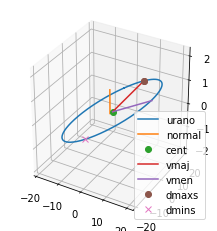

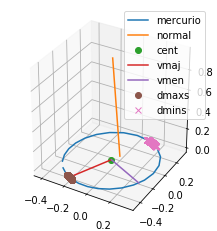

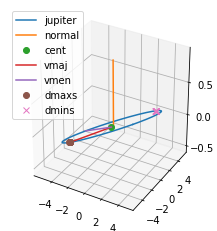

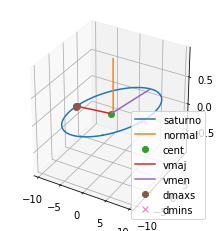

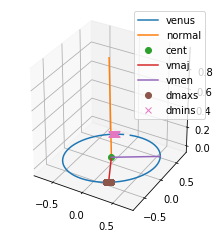

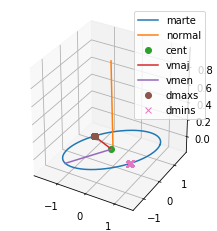

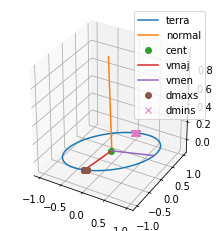

In [20]:
# plotamos
for a in range(len(archivos)):
    [x,y,z] = prOrbitas[a]
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot(x,y,z,label=descricoes[a].partition(' ')[0])
    ax1.plot([0,Ns[a][0]],[0,Ns[a][1]],[0,Ns[a][2]], label='normal' )
    [xmx,ymx,zmx] = lpmaxs[a]
    [xmn,ymn,zmn] = lpmins[a]
    [cx,cy,cz] = cents[a]
    [vmajx,vmajy,vmajz] = emajs[a]
    [vmenx,vmeny,vmenz] = emens[a]
    ax1.plot([cx],[cy],[cz],'o' ,label='cent')
    ax1.plot([cx,vmajx+cx],[cy,vmajy+cy],[cz,vmajz+cz], label='vmaj')
    ax1.plot([cx,vmenx+cx],[cy,vmeny+cy],[cz,vmenz+cz],label='vmen')
    ax1.plot(xmx,ymx,zmx,'o' ,label='dmaxs')
    ax1.plot(xmn,ymn,zmn, 'x' ,label='dmins')
    plt.legend()
    plt.show()

![](./figs/eixos_planetas.png)

# quantificamos o erro de $Orb_p$ estar na elipse fiteada

In [21]:
# calculamos o erro da orbita estar na elipse com os parametros achados
def fun_elipse(par,Orb):
    [x,y,z] = Orb
    [N,cent,ema,eme,la,lb] = par
    valf =0
    for i in range(len(x)):
        Pi = np.array([x[i],y[i],z[i]])
        valf += np.abs(np.dot(N,Pi/np.linalg.norm(Pi)))/len(x) + np.abs(np.dot(ema,Pi-cent)**2/la**4 +np.dot(eme,Pi-cent)**2/lb**4 - 1 )/len(x)
    return valf

for a in range(len(archivos)):
    err_ell=fun_elipse([Ns[a],cents[a],emajs[a],emens[a],dmediasols[a],l_bs[a]], prOrbitas[a])
    print(descricoes[a]+': erro com a elipse achada=',err_ell )


urano desde sol: erro com a elipse achada= 0.03912184953554507
mercurio desde sol: erro com a elipse achada= 0.0044031650572462595
jupiter desde sol: erro com a elipse achada= 0.0012344430359340739
saturno desde sol: erro com a elipse achada= 0.005011208835232853
venus desde sol: erro com a elipse achada= 0.0017060286911613194
marte desde sol: erro com a elipse achada= 0.00028650119123408357
terra desde sol: erro com a elipse achada= 0.0017959843197782107


# Moral (K1): 

- achamos a parametrização das orbitas como elipses coincidem com valores tabulados 
- a 'elipse fiteada' tem pouco erro comparada com os dados

# Lei (K2): areas iguais em tempos iguais 

Nota: os archivos de dados foram gerados de maneira tal que os pontos $P \in Orb_p$ estão equiespaciados no tempo. Logo, podemos usar o list-index como parametro temporal (que esquce o inicio $t_0$ e o espaçamento $\Delta t$, que são iguais para todos os planetas nos archivos 'tabela_..._sol.txt').


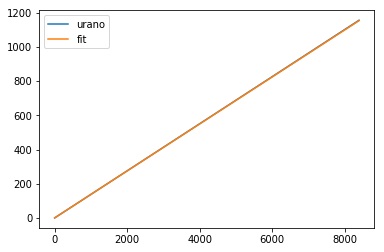

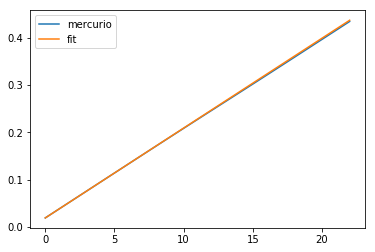

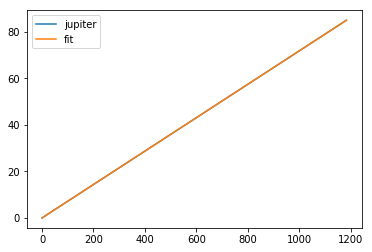

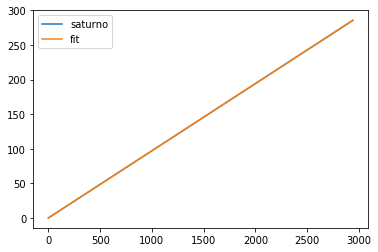

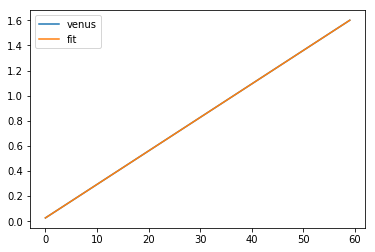

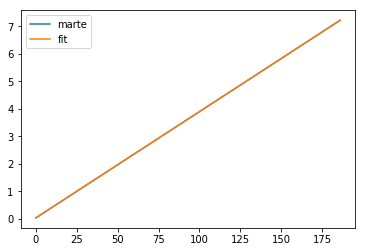

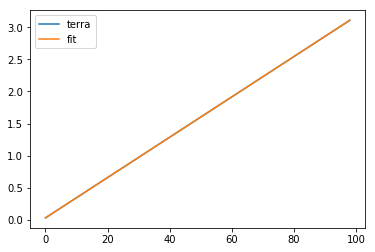

In [22]:
# calculamos Area (aproximada com triangulos) vs tempo 
stds = []
for a in range(len(archivos)):
    As = []
    Orb = prOrbitas[a]
    [x,y,z] = Orb
    its = range(len(x)-1)
    area = 0
    for i in range(len(x)-1):
        area += np.linalg.norm( np.cross(np.array([x[i+1],y[i+1],z[i+1]]), np.array([x[i],y[i],z[i]])) ) /2
        As.append(area)
    slope = (As[1]-As[0])/(its[1]-its[0])
    Afits = [(t-its[0])*slope + As[0]  for t in its]
    std = np.sqrt(sum([(As[i]-Afits[i])**2 for i in its]))/len(its)
    stds.append(std)
    plt.plot(its,As, label=descricoes[a].partition(' ')[0])
    plt.plot(its, Afits, label='fit')
    plt.legend()
    plt.show()

![](./figs/A_vs_t_terra.png)

In [23]:
# desvio padrao das retas (fiteads manualmente com so 2 pontos!)
for a in range(len(archivos)):
    print('list_ind:',a,', ',descricoes[a].partition(' ')[0], ', std fit manual:', stds[a])

list_ind: 0 ,  urano , std fit manual: 0.015757089702360935
list_ind: 1 ,  mercurio , std fit manual: 0.00031261236546418087
list_ind: 2 ,  jupiter , std fit manual: 6.334606325341542e-05
list_ind: 3 ,  saturno , std fit manual: 0.003377598907849765
list_ind: 4 ,  venus , std fit manual: 4.669564240460764e-06
list_ind: 5 ,  marte , std fit manual: 1.916867396161074e-05
list_ind: 6 ,  terra , std fit manual: 6.479475933687405e-05


# Moral (K2): 

- o comportamento da area varrida $A(t)$ com $t$ é extremadamente linear (fazendo um fit linear só como os 2 primeiros pontos, a desviação é minima!)

# Lei (K3):  $T^2 = k a^3$

Nota: já temos o $T$ aproximado (tempo de retorno 'indrets') e temos o $a$ (distancia media ao sol (foco))

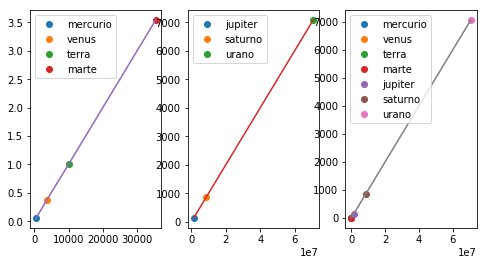

In [24]:
# plotamos T^2 vs a^3 para todos os planetas na nossa lista
#lista = range(len(archivos))
lista1 = ['mercurio', 'venus', 'terra', 'marte']
lista2 = ['jupiter', 'saturno','urano']
lista3 = ['mercurio', 'venus', 'terra', 'marte','jupiter', 'saturno','urano']
listas = [lista1,lista2,lista3]
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1,3,3)
ax = [ax1,ax2,ax3]
for il,lista in enumerate(listas):
    tempTquads = []
    tempacubs = []
    for el in lista:
        a = descsimps.index(el)
        Tquads_a = indrets[a][0]**2
        acubs_a = dmediasols[a]**3
        tempTquads.append(Tquads_a)
        tempacubs.append(acubs_a)
        ax[il].plot([Tquads_a],[acubs_a],'o' ,label=descsimps[a])
    ax[il].plot(tempTquads,tempacubs, '-')
    ax[il].legend()
plt.show()

![](./figs/Tquad_vs_acub.png)

In [25]:
#desvio padrao do K3
Tquads = [indrets[a][0]**2 for a in range(len(archivos))]
acubs = [dmediasols[a]**3 for a in range(len(archivos))]

slopes = [(acubs[i+1]-acubs[i])/(Tquads[i+1]-Tquads[i]) for i in range(len(archivos)-1)]
print('valor medio de k=',np.mean(slopes))
print('desvio padrao em ks=', np.std(slopes))

valor medio de k= 0.00010011465380689164
desvio padrao em ks= 1.0244133033021717e-07


# Moral (K3): 

- o comportamento do $T_p^2 \ vs \ a_p^3$ é extremadamente linear (com $p$ variando nos planetas considerados) !

# Exercicios:

### planetas:
- verificar as leis de Kepler para outros planetas: Neptuno, Plutao. Comparar os planos destas orbitas com os anteriores.
- fazer um (bom) 'fit 3d' dos parametros que definem as elipses (eg: pensar forma quadratica $Q(P)=(P-C)A(P-C)$ com $A$ matriz 3x3 simetrica e $C\in \mathbb{R}^3$ o centro)
- verificar a lei de gravitação de Newton, calcular a constante universal $G$ mediante calculo da aceleracao e usando as massas tabuladas (ou usando parametros das elipses, etc., das leis de Kepler já vistas)

### outros objetos celestes:
- verificar quais leis aplicam para a lua desde a terra (archivo em ./data/)
- plotar a trajetoria do voyager (archivo em ./data/), incluir planetas por onde vai passando (seria legal fazer um gif!)
- calcular a data do proximo eclipse (terra lua-no-meio sol)

In [26]:
# Uma rotina que transforma formato Calendar em nro de horas desde data inicial
df1 = DFs[0]
fts= list(df1['Calendar Date (TDB)'])

datainicial_str = re.search('\d{4}-\w{3}-\d{2}', fts[0]).group() # eg: 2019-Apr-22
datainicial = datetime.datetime.strptime(datainicial_str, '%Y-%b-%d').date() # transforma em datetime
print('data inicial:', datainicial)

ts_hr = []
for i in range(len(fts)):
    data_str = re.search('\d{4}-\w{3}-\d{2}', fts[i]) # eg: 2019-Apr-22
    horafull = re.search('(\d{2}):(\d{2}):(\d{2}).(\d{4})', fts[i]) # eg: 03:00:00.0000
    hr = int(horafull.group(1)) # eg: 3
    data = datetime.datetime.strptime(data_str.group(), '%Y-%b-%d').date()
    deltat_dias = (data-datainicial).days
    ts_hr.append(deltat_dias * 24 + hr )




data inicial: 1919-04-22
